In [6]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

vértice 1 sucetivel a t com probabilidade atual de -inf no tempo 1
vértice 1 sucetivel a t com probabilidade atual de 0.6705280069129911 no tempo 2
vértice 1 sucetivel a t com probabilidade atual de 0.8423616199926777 no tempo 3
vértice 1 sucetivel a t com probabilidade atual de 0.893269975655089 no tempo 4
vértice 1 sucetivel a t com probabilidade atual de 0.9167907559155695 no tempo 5
vértice 1 sucetivel a t com probabilidade atual de 0.9539201280878117 no tempo 6
vértice 1 sucetivel a t com probabilidade atual de 0.9784246359071623 no tempo 7
vértice 1 sucetivel a t com probabilidade atual de 0.9806600547081654 no tempo 8
vértice 1 sucetivel a t com probabilidade atual de 0.9888849006107148 no tempo 9
vértice 1 sucetivel a t com probabilidade atual de 0.9869073200321524 no tempo 10
vértice 1 sucetivel a t com probabilidade atual de 0.9931301415735205 no tempo 11
vértice 1 sucetivel a t com probabilidade atual de 0.992552894029138 no tempo 12
vértice 1 sucetivel a t com probabilidade

C:\Users\Kiyo\AppData\Local\Temp\ipykernel_1576\76139336.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  prod *= (1 - B*A[i][j]*xi[j]) #produtorio


vértice 8 sucetivel a t com probabilidade atual de 0.9991623447138626 no tempo 42
vértice 8 sucetivel a t com probabilidade atual de 0.9991287742009771 no tempo 43
vértice 8 sucetivel a t com probabilidade atual de 0.9980615389692576 no tempo 44
vértice 8 sucetivel a t com probabilidade atual de 0.9986716136483733 no tempo 45
vértice 8 sucetivel a t com probabilidade atual de 0.9989528325228408 no tempo 46
vértice 8 sucetivel a t com probabilidade atual de 0.99870161104978 no tempo 47
vértice 8 sucetivel a t com probabilidade atual de 0.9992599374250204 no tempo 48
vértice 8 sucetivel a t com probabilidade atual de 0.9990913520332441 no tempo 49
vértice 8 sucetivel a t com probabilidade atual de 0.9991060550347526 no tempo 50
vértice 8 sucetivel a t com probabilidade atual de 0.999151574947809 no tempo 51
vértice 8 sucetivel a t com probabilidade atual de 0.9990547891378196 no tempo 52
vértice 8 sucetivel a t com probabilidade atual de 0.9989349485408403 no tempo 53
vértice 8 sucetivel

70.15

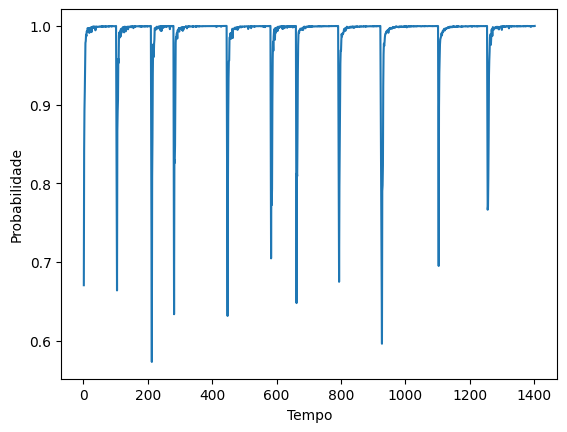

In [ ]:
#Matriz de adjacencia que modela o grafo cujo os vértices são as opiniões/posts

n = 20
A = np.zeros((n, n))  # preenchida com 0.0
rng = np.random.default_rng()
for i in range(n):
    for j in range(n):
        if j == i:
            A[i][j] = 0
        else:
            A[i][j] = rng.random()


#PARAMETROS INICIAIS DO PROBLEMA

B = 0.67 #Taxa de transmissão

#Probabilidade de um post influenciar um vértice i num tempo t+1
def probx(tempo, MA, i, Taxainfo): 
    prod = 1
    x = [sp.norm.pdf(t, rng.random(), rng.random()), sp.uniform.pdf(t, rng.random(), 1), sp.bernoulli.pmf(t, rng.random(), rng.random()), sp.poisson.pmf(t, rng.random()),
         sp.binom.pmf(t, 10*t, 0.5),  sp.expon.pdf(t, scale=rng.random()), sp.gamma.pdf(t, rng.random()), sp.beta.pdf(t, rng.random(), rng.random()), sp.chi2.pdf(t, rng.random()), 
         sp.t.pdf(t, rng.random()), sp.f.pdf(t, rng.random(), rng.random()), sp.lognorm.pdf(t, rng.random()), sp.weibull_min.pdf(t, rng.random()), sp.rayleigh.pdf(t), 
         sp.pareto.pdf(t, rng.random()), sp. geom.pmf(t, rng.random()), sp.hypergeom.pmf(t, 20, 7, 12), sp.nbinom.pmf(t, rng.random(), rng.random()), sp.laplace.pdf(t), sp. cauchy.pdf(t)] #vetor de estado
    xi = np.array(x)
    xi.transpose()
    for j in range(len(A)):
        prod *= (1 - B*A[i][j]*xi[j]) #produtorio
    return prod
results = []
r = 0 #contador do tempo total 
#Calculo de quanto tempo cada vertice leva para ser influenciado

for i in range(len(A)):
    
    prob = 0
    t = 1 #Parâmetros de informação
    k = 0 #Contador de iteração
    while prob != 1:
        prob = probx(t, A, i, B)
        results.append(prob)
        
        if prob == 'nan':
            break
        if prob > 0.9999:
                prob = 1
        
        if prob == 1:
            print(f'vértice {i+1} foi convencido por t após {k} tempos')
            prob = 0
            break
        else:
            print(f'vértice {i+1} sucetivel a t com probabilidade atual de {prob} no tempo {t}')
        t = t + 1
        k = k+1
    r = r + t
ts = np.linspace(1,r,len(results))
df = pd.DataFrame({
    'Tempo' : ts,
    'Probabilidade': results
})
r/20


C:\Users\Kiyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='Tempo', ylabel='Probabilidade'>

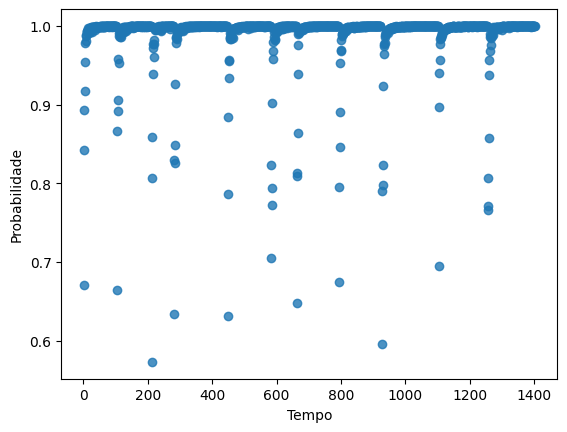

In [32]:
sns.regplot(data= df, x='Tempo', y='Probabilidade')

In [13]:
#Analise da conectividade do grafo
#Matriz de Graus 
D = np.zeros((n, n)) 
for i in range(len(A)):
    for j in range(len(A)):
        D[i][i] = D[i][i]+ A[i][j]

#Matriz Laplaciana
L = D - A

VA, VE = np.linalg.eig(L) #autovalores e autovetores
VA = sorted(VA, reverse=True)

if VA[-2] > 1: 
    print(f'Grafo traduzido na forma da Matriz A é conexo, com conectividade algébrica: {VA[-2]}')
elif VA[-2] < 1 and VA[-2] > 0:
    print(f'Grafo traduzido na forma da Matriz A é moderadamente conexo, com conectividade algébrica: {VA[-2]}')
else:
    print(f'Grafo traduzido na forma da Matriz A é desconexo, com conectividade algébrica: {VA[-2]}')

Grafo traduzido na forma da Matriz A é conexo, com conectividade algébrica: (7.202070008035103+0j)
